# Exercice

Résoudre le programme

$$
\underset{g_1(x,y)\geq 0, g_2(x,y)\geq 0}{\sup} f(x,y)
$$
Avec 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
plt.rcParams["figure.figsize"] = (15, 10)

In [1]:
import sympy as sp

In [3]:
sp.init_printing()

In [4]:
x, y = sp.symbols("x y")
x, y

In [35]:
f = 1 - 2 * x - x ** 2 - y ** 2
f

## Premier cas

$$
f(x,y)= 1 - 2x-x^2-y^2
$$

$$
g_1(x,y) = 2+2x-2y-x^2-y^2
$$

$$
g_2(x,y)=2+2x+2y-x^2-y^2
$$

In [9]:
g1 = 2 + 2 * x - 2 * y - x ** 2 - y ** 2
g2 = 2 + 2 * x + 2 * y - x ** 2 - y ** 2
g1, g2

In [83]:
xs, ys = np.linspace(-1, 3, 800), np.linspace(-1.5, 1.5, 600)
X, Y = np.meshgrid(xs, ys)
G1 = sp.lambdify(args=(x,y), expr=g1)(X, Y)
G2 = sp.lambdify(args=(x,y), expr=g2)(X, Y)
F = sp.lambdify(args=(x,y), expr=f)(X, Y)

CPU times: user 3.47 s, sys: 138 ms, total: 3.61 s
Wall time: 3.53 s


<a list of 9 text.Text objects>

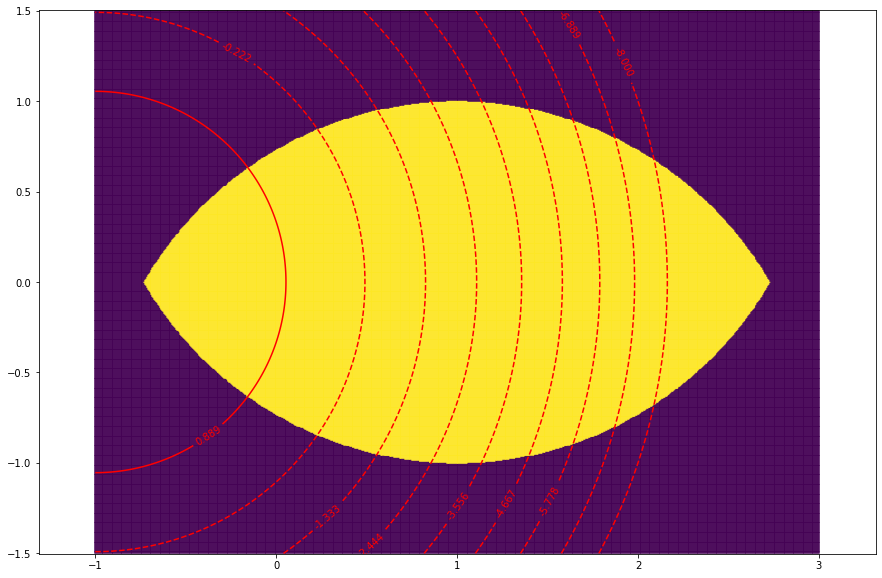

In [84]:
%%time
figure, repere = plt.subplots()
repere.axis("equal")


Z = np.where((G1 >= 0) & (G2 >= 0), 1, 0)
repere.pcolor(X, Y, Z, cmap="viridis", alpha=0.5, shading="auto")

c = repere.contour(X, Y, F, levels=np.linspace(-8, 2, 10), colors="red")
repere.clabel(c)
#c1 = repere.contour(X, Y, G1, levels=[0], colors="blue")
#repere.clabel(c1)
#c2 = repere.contour(X, Y, G2, levels=[0], colors="red")
#repere.clabel(c2)

CPU times: user 177 ms, sys: 26.6 ms, total: 203 ms
Wall time: 165 ms


<a list of 9 text.Text objects>

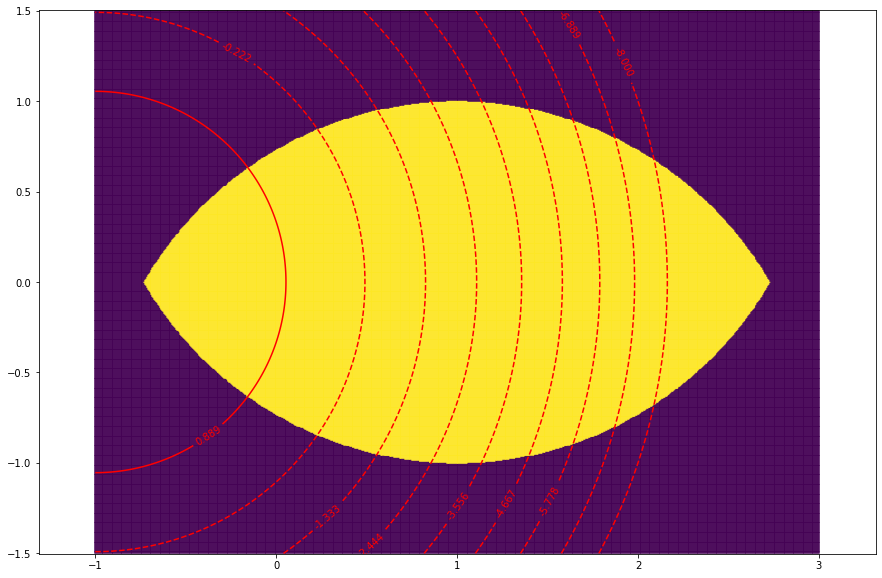

In [85]:
%%time
figure, repere = plt.subplots()
repere.axis("equal")


Z = np.where((G1 >= 0) & (G2 >= 0), 1, 0)
repere.pcolormesh(X, Y, Z, cmap="viridis", alpha=0.5, shading="auto")

c = repere.contour(X, Y, F, levels=np.linspace(-8, 2, 10), colors="red")
repere.clabel(c)
#c1 = repere.contour(X, Y, G1, levels=[0], colors="blue")
#repere.clabel(c1)
#c2 = repere.contour(X, Y, G2, levels=[0], colors="red")
#repere.clabel(c2)

CPU times: user 228 ms, sys: 44.2 ms, total: 272 ms
Wall time: 193 ms


<a list of 9 text.Text objects>

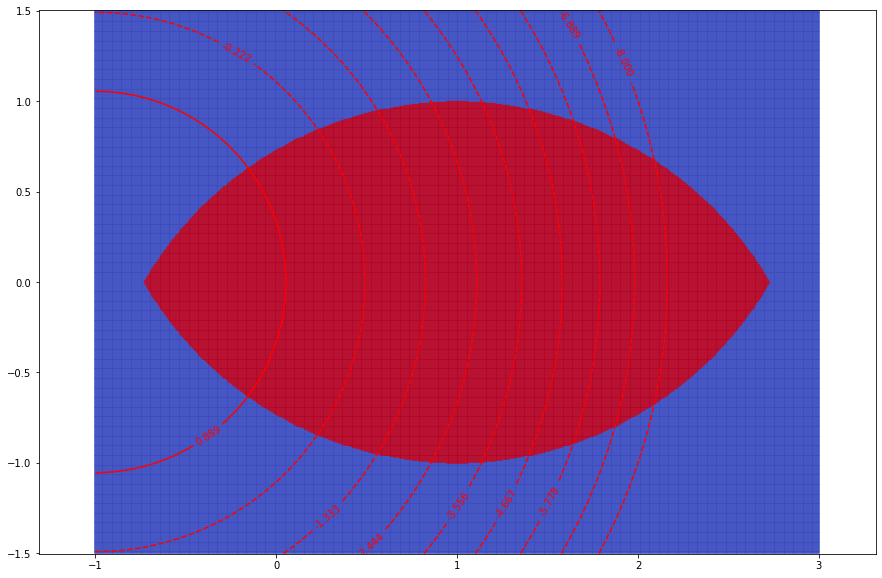

In [86]:
%%time
figure, repere = plt.subplots()
repere.axis("equal")


Z = np.where((G1 >= 0) & (G2 >= 0), 1, 0)
repere.pcolormesh(X, Y, Z, cmap="coolwarm", alpha=0.5, shading="auto")

c = repere.contour(X, Y, F, levels=np.linspace(-8, 2, 10), colors="red")
repere.clabel(c)
#c1 = repere.contour(X, Y, G1, levels=[0], colors="blue")
#repere.clabel(c1)
#c2 = repere.contour(X, Y, G2, levels=[0], colors="red")
#repere.clabel(c2)

CPU times: user 300 ms, sys: 74.5 ms, total: 374 ms
Wall time: 221 ms


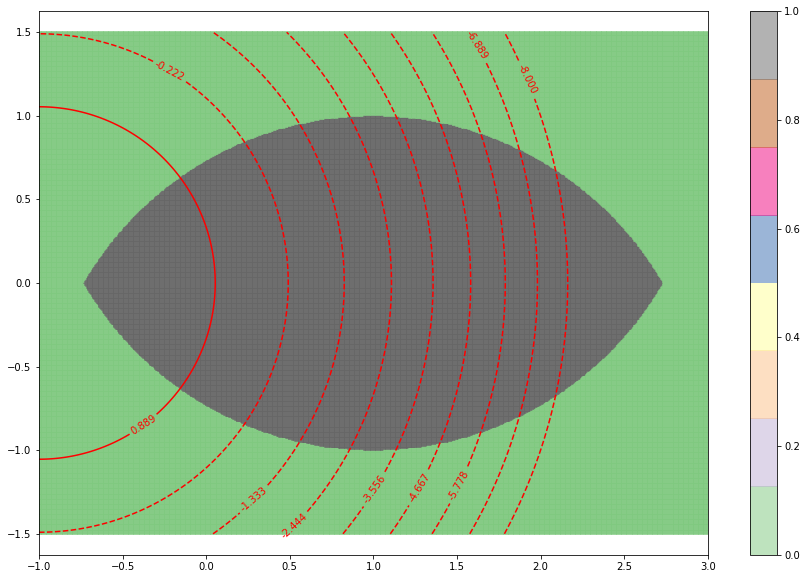

In [87]:
%%time
figure, repere = plt.subplots()
repere.axis("equal")


Z = np.where((G1 >= 0) & (G2 >= 0), 1, 0)
zonage = repere.pcolormesh(X, Y, Z, cmap="Accent", alpha=0.5, shading="auto")

c = repere.contour(X, Y, F, levels=np.linspace(-8, 2, 10), colors="red")
repere.clabel(c)
#c1 = repere.contour(X, Y, G1, levels=[0], colors="blue")
#repere.clabel(c1)
#c2 = repere.contour(X, Y, G2, levels=[0], colors="red")
#repere.clabel(c2)
figure.colorbar(zonage)

- On s'attend à ce que le maximum soit atteint (car le domaine est fermé borné).
- On s'attend à ce que le maximum soit atteint dans le coin à gauche du domaine jaune.

**ATTENTION** 
- notez la rapidité de `pcolormesh` par rapport à `pcolor`. ([différence entre les deux](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html#differences-pcolor-pcolormesh))
- notez l'impact du choix de la `colormap` suivant le résultat voulu. ([documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

### Intérieur du domain

In [40]:
gradient = [sp.diff(f, x), sp.diff(f, y)]
gradient

In [42]:
sol = sp.solve(gradient, (x,y))
sol

In [43]:
g1.subs(sol)

In [44]:
g2.subs(sol)

L'unique point critique est hors du domain de maiximisation. Le maximum n'est donc pas atteint à l'intérieur.

### Partie lisse du bord.

Il est en deux parties 
$$
B_1 := \{(x,y)\ :\ g_1(x,y)=0,\quad g_2(x,y)>0\}
$$
$$
B_2 := \{(x,y)\ :\ g_1(x,y)>0,\quad g_2(x,y)=0\}
$$

In [45]:
la = sp.symbols("\lambda")
la

In [46]:
L1 = f + la * g1
L1

In [47]:
gradient = [sp.diff(L1, var) for var in(x, y, la) ]
gradient

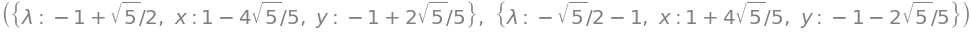

In [51]:
sol1, sol2 = sp.solve(gradient, (x, y, la), dict=True)
sol1, sol2

In [53]:
g2.subs(sol1) > 0

False

Le maximum n'est pas atteint sur $B_1$.

On peut faire de même pour $B_2$.

### Points anguleux

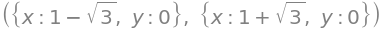

In [55]:
sol1, sol2 = sp.solve([g1, g2], (x, y), dict=True)
sol1, sol2

In [56]:
def prod_scal(u, v):
    return sp.diff(u, x) * sp.diff(v, x) + sp.diff(u, y) * sp.diff(v, y)

In [60]:
prod_scal(f, g1).subs(sol1) > 0

False

In [61]:
prod_scal(f, g2).subs(sol1) > 0

False

In [62]:
prod_scal(f, g1).subs(sol2) > 0

True

In [63]:
prod_scal(f, g2).subs(sol2) > 0

True

On voit que le maximum est atteint pour `sol1`

### Alternative

In [64]:
la1, la2 = sp.symbols("\lambda_1 \lambda_2")

In [65]:
L = f + la1 * g1 + la2 * g2
L

In [70]:
sol1, sol2 = sp.solve([sp.diff(L, var) for  var in (x, y, la1, la2)], (x,y,la1, la2), dict=True)

In [72]:
sol1[la1] > 0

True

In [73]:
sol1[la2] > 0

True

### Remarques

Il resterait encore
- à prouver la compacité du domaine de maximisation
- à montrer le caractère lisse des bords en invoquant les fonctions implicites
- à montrer la liberté des gradients aux points anguleux.

## Second cas

$$
f(x,y)= 1 + 2x-x^2-y^2
$$

$$
g_1(x,y) = 3-2y-x^2-y^2
$$

$$
g_2(x,y) = 3-2y-x^2-y^2
$$

## Troisième cas

$$
f(x,y)= 1 + 2x - x^2 - y^2
$$

$$
g_1(x,y) = 4 - x^2 - y^2
$$

$$
g_2(x,y) = 4x - x^2 - y^2
$$